# Chapter 5 - Combining dataframes and scraping Canadian weather data

In [74]:
%pylab inline
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
figsize(15, 5)

# Always display all the columns
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

import matplotlib
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
line_width has been deprecated, use display.width instead (currently both are
identical)



In [75]:
weather_2012_final = pd.read_csv('./data/weather_2012.csv', index_col='Date/Time')

In [76]:
weather_2012_final[0: 5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


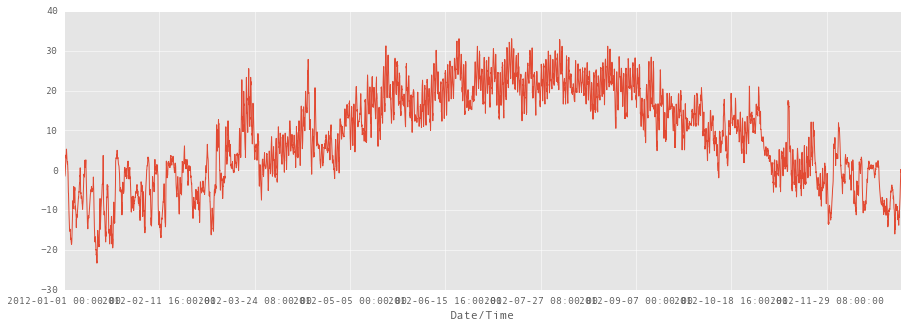

In [77]:
weather_2012_final['Temp (C)'].plot()

## 5.1 Downloading one month of weather data

In [29]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?format=csv&stationID=5415&Year={year}&Month={month}&timeframe=1&submit=Download+Data"

In [46]:
url = url_template.format(month = 3, year = 2012)

In [47]:
weather_2012_mar = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True, encoding='latin1')

In [48]:
weather_2012_mar.head()

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,Wind Dir (10s deg),Wind Dir Flag,Wind Spd (km/h),Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,NaN,5,NaN,24,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,NaN,6,NaN,26,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,NaN,5,NaN,28,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,NaN,5,NaN,28,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,NaN,5,NaN,35,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14,NaN,Snow


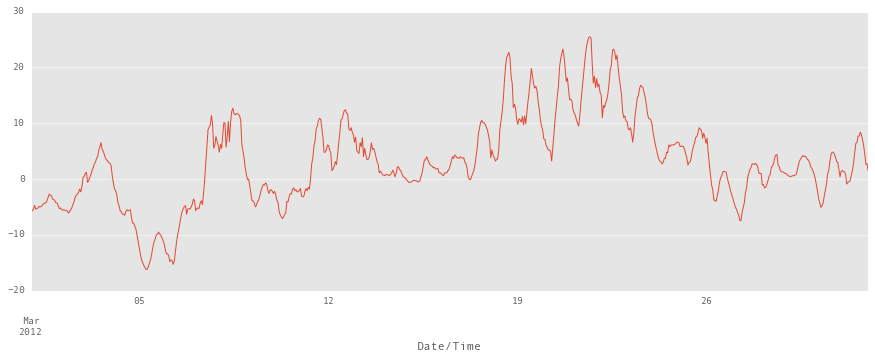

In [33]:
weather_2012_mar[u"Temp (Â°C)"].plot()

In [34]:
weather_2012_mar = weather_2012_mar.dropna(axis=1, how = 'any')

In [35]:
weather_2012_mar[: 5]

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Dew Point Temp (Â°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,-7.8,83,35,1.6,100.62,Snow


In [36]:
weather_2012_mar = weather_2012_mar.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)

In [37]:
weather_2012_mar.head()

,Temp (Â°C),Dew Point Temp (Â°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


## 2.3 Plotting the temperature by hour of day

In [41]:
temperatures = weather_2012_mar[['Temp (C)']]

In [42]:
temperatures['Hour'] = temperatures.index.hour

/Users/wangshuailong/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


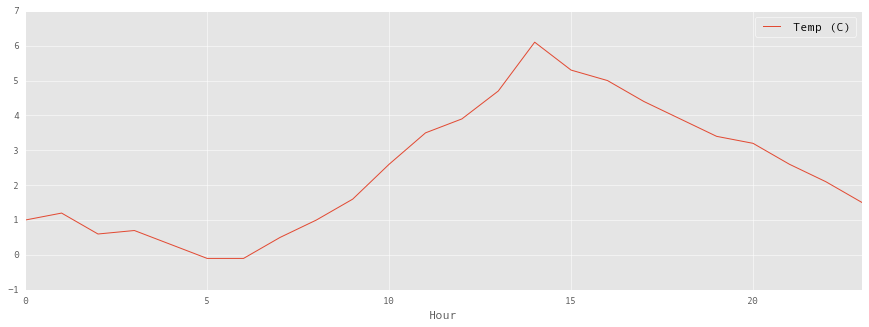

In [43]:
temperatures_hour = temperatures.groupby('Hour').aggregate(np.median).plot()

## 5.3 Getting the whole year of data

In [72]:
def get_weather_data(year, month):
    if month == 1:
        year += 1
    url = url_template.format(year = year, month = month)
    data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    data = data.dropna(axis = 1)
    data = data.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1)
    return data

In [73]:
data_by_month = [get_weather_data(2012, i) for i in range(0, 13)]

In [62]:
weather_2012 = pd.concat(data_by_month)

In [63]:
weather_2012.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


## 5.4 Saving to CSV

In [26]:
weather_2012.to_csv('./data/weather_2012.csv')